In [6]:
!pip install networkx
!pip install matplotlib
!pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.1 MB/s eta 0:00:00a 0:00:010m
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 2.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 1.4 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 1.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 1.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.1 MB/s eta 0:00:0000:0100:01
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 1.8 MB/s eta 0:00:00a 0:00:01


In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [2]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

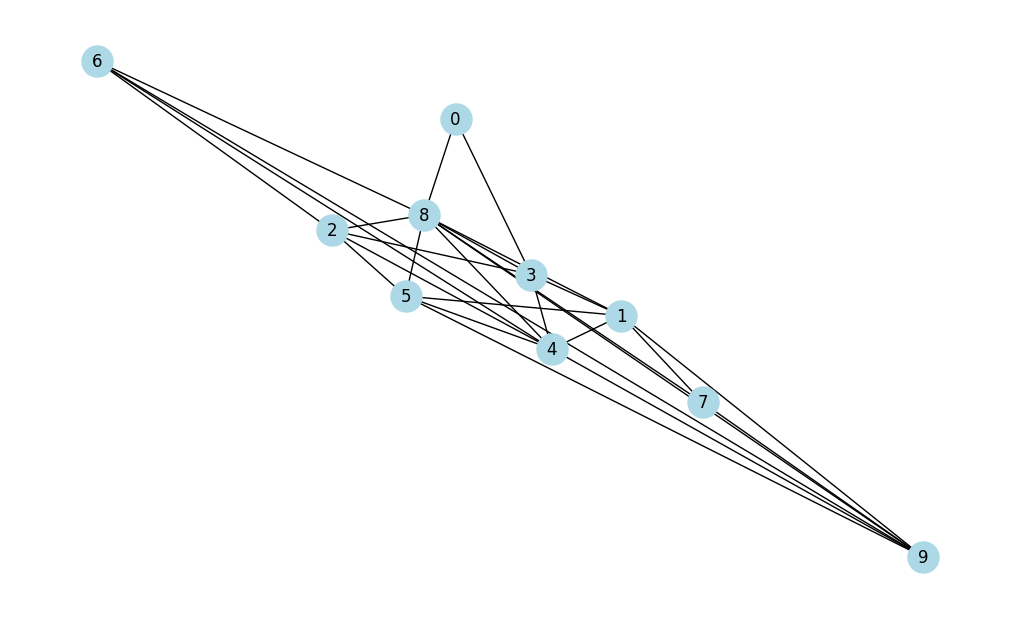

In [3]:
G = gnp_random_connected_graph(10, 0.5, False, True)

# Minimum spanning trees algorithms 

## Kruskal's algorithm

In [4]:
from networkx.algorithms import tree

In [5]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

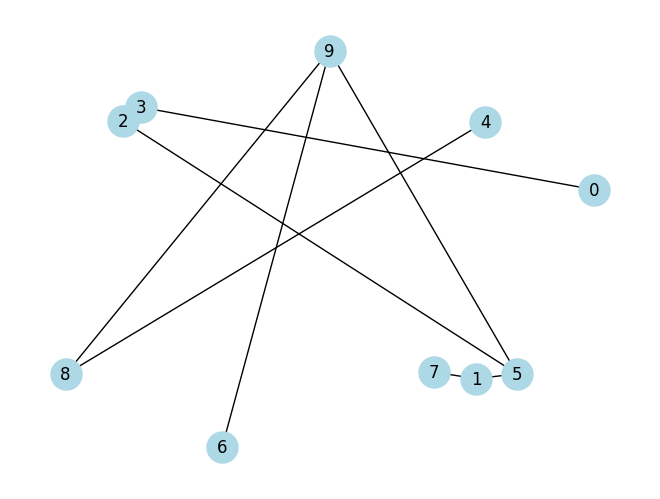

In [6]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [7]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 3), (1, 5), (1, 7), (2, 5), (2, 3), (4, 8), (5, 9), (6, 9), (8, 9)]),
 9)

In [114]:
from operator import itemgetter

def kruskal(G):
    """
    Realisation of Kruskal's algorithm to find minimal spanning 
    tree of graph G 
    """
    edges = [ ((edge[0], edge[1]), edge[2]['weight']) for edge in G.edges(data=True)]
    edges.sort(key=itemgetter(1))

    mst = nx.Graph()
    partitioning = [ {node} for node in G.nodes ]

    while len(partitioning) != 1:
        
        for edge in edges:
            (u, v), weight = edge
            u_set = set()
            v_set = set()
            for partition in partitioning:
                if v_set and u_set:
                    break

                if u in partition:
                    u_set = partition
                if v in partition:
                    v_set = partition

            if v_set != u_set:
                mst.add_edge(u, v, weight=weight)
                u_set |= v_set
                partitioning.remove(v_set)
                break
        edges.remove(edge)

    return mst

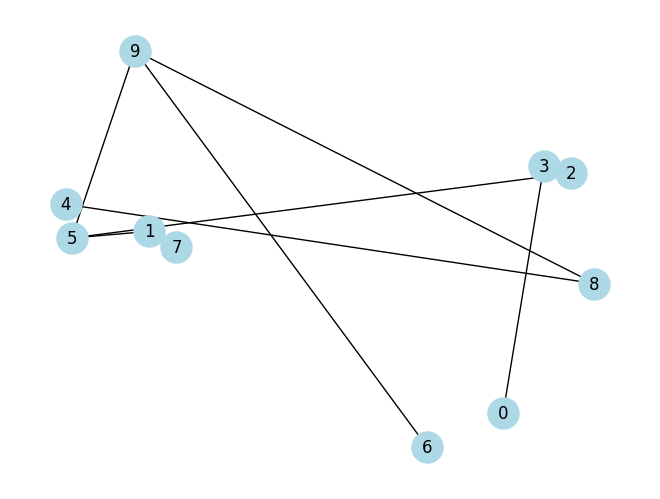

In [9]:
mstk_r = kruskal(G)

nx.draw(mstk_r, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

## Prim's algorithm

In [10]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")

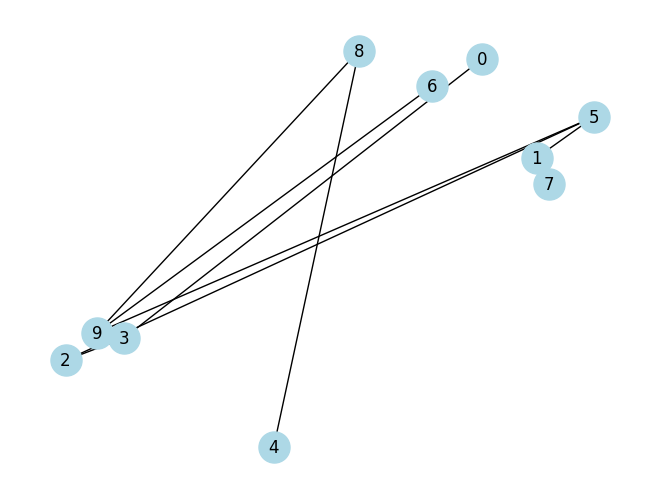

In [11]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [12]:
mstp.edges(), len(mstp.edges())
mstp.size(weight="weight")

-10.0

In [13]:
def prim_mst(G):
    """
    Find minimum spannint tree using Prim's algorithm.
    Start node is the first node in node list    
    """
    mst = nx.Graph()

    nodes = list(G.nodes)
    mst.add_node(nodes.pop(0))

    while nodes:

        minimum_edge = None
        minumum_weight = float('inf')
        
        for u in mst.nodes:
            for v in nodes:
                if G.has_edge(u, v) and G[u][v]["weight"] < minumum_weight:
                    minimum_edge = (u, v)
                    minumum_weight = G[u][v]["weight"]

        nodes.remove(minimum_edge[1])        
        mst.add_edge(*minimum_edge, weight=minumum_weight)

    return mst



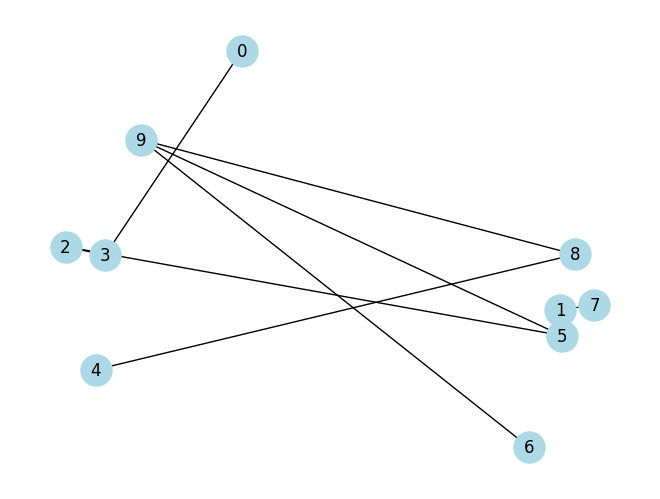

In [14]:
mstp_r = prim_mst(G)

nx.draw(mstp_r, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [15]:
mstp_r.edges(), len(mstp_r.edges())
mstp_r.size(weight="weight")

-10.0

## Testing

In [115]:
import time
from tqdm import tqdm

def test_correctness(networkx_algorithm_name: str, my_realization: callable):

    for i in range(1, 100):
        n = i*50
        for j in range(1, 20):
            G = gnp_random_connected_graph(n, 1 / j, False, False)
            mst = nx.minimum_spanning_tree(G, algorithm=networkx_algorithm_name)
            mst_r = my_realization(G)
            assert mst.size(weight="weight") == mst_r.size(weight="weight")

def test_average_time_consumption(algorithm: callable, 
                                  num_of_nodes = 100,
                                  num_of_iterations = 1000):
    time_taken = 0
    for i in tqdm(range(num_of_iterations)):
        
        # note that we should not measure time of graph creation
        G = gnp_random_connected_graph(num_of_nodes, 0.4, False)
        
        start = time.time()
        algorithm()
        end = time.time()
        
        time_taken += end - start

    return time_taken / num_of_iterations

def plot_time_size(max_nodes, completeness):

    step = 1000
    networkx_performance = []
    realization_performance = []
    x = list(range(1, max_nodes, step))

    for i in x:
        g = gnp_random_connected_graph(i, completeness, False, False)
        start = time.perf_counter()
        mst_nx = tree.minimum_spanning_tree(g, algorithm="kruskal")
        str(mst_nx.edges())
        end = time.perf_counter()
        print("nx", end-start)
        networkx_performance.append(end-start)

        start = time.time()
        kruskal(g) 
        end = time.time()
        print("r", end-start)
        realization_performance.append(end-start)
    plt.plot(x, networkx_performance, label="networkx algorithm")
    plt.plot(x, realization_performance, label="rezizarion algorithm")
    plt.legend()

    plt.show()


In [116]:
plot_time_size(10000, 0.5)

1
nx 4.084600368514657e-05
r 6.4373016357421875e-06
1
nx 1.5339639379963046
r 2.264861822128296
1
nx 4.035232652000559
r 19.33615255355835
1
nx 8.459437329001958


KeyboardInterrupt: 

In [77]:
g = gnp_random_connected_graph(1000, 0.5, False, False)
start = time.perf_counter()
mst = tree.minimum_spanning_tree(g)
end = time.perf_counter()
end-start

0.5693584379987442